<b><font size="6">Instance Based Learning</font><a class="anchor"><a id='toc'></a></b><br>

In this notebook we are going to apply Instance Based Classifiers in Python.

<div class="alert alert-block alert-info">
    
# TOC<a class="anchor"><a id='toc'></a></b><br>
* [<font color='#E8800A'>1. KNN Classifier</font>](#first-bullet) <br>
    - 1.1. Methods
    - 1.2. Changing the number of neighbors
    - 1.3. Changing the algorithm : Brute Force Vs. KDTree
    - 1.4. Change the distance metric
    - 1.5. Using a Weighted Distance
- [<font color='#E8800A'>2. KNN Imputer</font>](#third-bullet)<br>
- [<font color='#E8800A'>3. KNN Regression (EXERCISE)</font>](#second-bullet)<br>
    - 3.1. Methods
</div>

# <font color='#E8800A'>1. KNN Classifier</font> <a class="anchor" id="first-bullet"></a>
  [Back to TOC](#toc)
  
In the classification problem, we are going to use the Iris dataset - this is perhaps the best known database to be found in the pattern recognition literature. The attributes in the dataset are:

- __SepalLengthCm:__ sepal length in cm
- __SepalWidthCm:__ sepal width in cm
- __PetalLengthCm:__ petal length in cm
- __PetalWidthCm:__ petal width in cm
- __Target:__ Iris Setosa(Class 0), Iris Versicolour (Class 1), Iris Virginica (Class 2)


<img src="Images\iris.png" style="height:300px">

__Step 1:__ Import KNeighborsClassifier from sklearn.neighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier

__Step 2:__ Import Iris Dataset and check the structure of this dataset

In [2]:
import pandas as pd
iris = pd.read_csv('Iris.csv')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


__Step 3:__ Assign to the object `data` the values from iris excepting the dependent variable and assign to the object `target` the independent variable.

In [3]:
data = iris.drop(['Target'], axis=1)
target = iris['Target']

__Step 4:__ Import train_test_split from sklearn.model_selection and split the dataset tugas into X_train, X_val, y_train and y_val, defining `train_size` as 0.75 , `random_state`equal to 5 and `stratify` by the target.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, target, train_size=0.75, stratify = target, random_state=5)

__Step 5:__ Using KNeighborsClassifier, create a Nearest Neighbor classifier instance called modelKNN.

In [5]:
modelKNN = KNeighborsClassifier()

### 1.1. Methods in KNeighborsClassifier

__Step 6:__ Use the `.fit()`method of model to fit the model to the array of points `X_train` and `y_train`,i.e., associate the argument keyword `X` to `X_train` and `y` to `y_train`.

In [6]:
modelKNN.fit(X = X_train, y = y_train)

KNeighborsClassifier()

__Step 7:__ Use the `.predict()` method of modelKNN to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.


In [7]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)
labels_val

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1], dtype=int64)

__Step 8:__ Use the `.predict_proba()` method of modelKNN to obtain the probability estimates for the `X_val`


In [8]:
modelKNN.predict_proba(X_val)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

__Step 9:__ Use the `.score()` method of modelKNN to obtain the mean accuracy of the model in the training data and in the validation data.

In [9]:
print(modelKNN.score(X_train, y_train))
print(modelKNN.score(X_val, y_val))

0.9732142857142857
0.9210526315789473


By comparing the results of Step 9 we can verify that the accuracy of the model is higher in the train dataset. We are in a case of overfitting.

__Step 10:__ Use the `.kneighbors()` method of modelKNN to finds the K-neighbors of a point, and define the arguments `X=X_val`. Using this method, you will obtain an array representing the lengths between a point to the five nearest neighbors, and the indices of the nearest points in the population matrix.

In [10]:
modelKNN.kneighbors(X = X_val)

(array([[0.14142136, 0.14142136, 0.17320508, 0.17320508, 0.24494897],
        [0.14142136, 0.17320508, 0.17320508, 0.2236068 , 0.2236068 ],
        [0.33166248, 0.36055513, 0.37416574, 0.43588989, 0.46904158],
        [0.14142136, 0.17320508, 0.2       , 0.2236068 , 0.2236068 ],
        [0.1       , 0.31622777, 0.33166248, 0.38729833, 0.43588989],
        [0.36055513, 0.54772256, 0.6164414 , 0.64031242, 0.65574385],
        [0.14142136, 0.17320508, 0.24494897, 0.37416574, 0.38729833],
        [0.14142136, 0.14142136, 0.17320508, 0.24494897, 0.28284271],
        [0.89442719, 0.92736185, 0.96436508, 1.22065556, 1.2489996 ],
        [0.28284271, 0.31622777, 0.31622777, 0.33166248, 0.34641016],
        [0.2       , 0.31622777, 0.43588989, 0.43588989, 0.51961524],
        [0.3       , 0.31622777, 0.37416574, 0.37416574, 0.38729833],
        [0.52915026, 0.54772256, 0.60827625, 0.80622577, 0.81853528],
        [0.14142136, 0.17320508, 0.17320508, 0.2       , 0.26457513],
        [0.31622777,

### 1.2. Change the number of neighbors (k) (default = 5)

__Step 11:__ We can change the number of neighbors to consider in order to classify new instances to 3 by creating a new KNN classifier where `n_neighbors=3`. Create a new instance of KNeighborsClassifier named as `modelKNN3` with `n_neighbors=3` and fit to your training data.

In [11]:
modelKNN3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

__Step 12:__ Use the `.predict()` method of modelKNN3 to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [12]:
labels_train = modelKNN3.predict(X_train)
labels_val = modelKNN3.predict(X_val)

__Step 13:__ Use the `.predict_proba()` method of modelKNN5 to obtain the probability estimates for the `X_val`

In [13]:
modelKNN3.predict_proba(X_val)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.

__Step 14:__ Use the `.score()` method of modelKNN3 to obtain the mean accuracy of the model in the training and the validation data.

In [14]:
print(modelKNN3.score(X_train, y_train))
print(modelKNN3.score(X_val, y_val))

0.9642857142857143
0.9473684210526315



<div class="alert alert-block alert-success">

### <font color='#900C3F'>!! What is the impact of changing the number of neighbors? !!</font>

Compare the results between a KNN model where the number of neighbors is small and when the number of neighbors is large:

__Number of Neighbors = 1__

In [15]:
modelKNN1 = KNeighborsClassifier(n_neighbors=1).fit(X = X_train, y = y_train)
print(modelKNN1.score(X_train, y_train))
print(modelKNN1.score(X_val, y_val))

1.0
0.9473684210526315


__Number of Neighbors = 3__

In [16]:
modelKNN3 = KNeighborsClassifier(n_neighbors=3).fit(X = X_train, y = y_train)
print(modelKNN3.score(X_train, y_train))
print(modelKNN3.score(X_val, y_val))

0.9642857142857143
0.9473684210526315


__Number of Neighbors = 100__

In [17]:
modelKNN100 = KNeighborsClassifier(n_neighbors=100).fit(X = X_train, y = y_train)
print(modelKNN100.score(X_train, y_train))
print(modelKNN100.score(X_val, y_val))

0.6517857142857143
0.6052631578947368


__Step 15:__ To identify the optimal number of neighbors to select, create a loop where you test the mean accuracy score in validation, where the number of neighbors range from 1 to 20. Check the number of neighbors to keep and the f1 score in the train and validation for that number of neighbors.

In [19]:
import numpy as np
numberK_list=np.arange(1,21)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 11
Mean accuracy in train with 11 neighbors: 0.973214
Mean accuracy in validation with 11 neighbors: 0.973684


<div class="alert alert-block alert-success">
    
#### __Conclusion:__ <br>
1) A small number of neighbors could lead to overfitting; <br>
2) A big number of neighbors can lead to underfitting.<br>

### 1.3. Change the algorithm

__Step 16:__ We can change the algorithm used from `auto` to a specific option, for example the k-d tree by creating a new KNN classifier where `algorithm='kd_tree'`. The theoretical KNN basic algorithm is considered as a brute-force algorithm (algorithm = 'brute). Let's see the difference in speed, comparing in a bigger dataset the time it takes to train and predict in the traditional method and using KDTree. <br> <br>
Create a new instance of KNeighborsClassifier named as `modelKNNT` with `algorithm='kd_tree'` and fit to your training data.

In [20]:
modelKNNT = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, y_train)

__Step 17:__ Use the `.predict()` method of modelKNNT to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [21]:
labels_train = modelKNNT.predict(X_train)
labels_val = modelKNNT.predict(X_val)

__Step 18:__ Use the `.score()` method of modelKNNT to obtain the mean accuracy of the model in the training and the validation data.

In [22]:
modelKNNT.score(X_train, y_train)
modelKNNT.score(X_val, y_val)

0.9210526315789473

<div class="alert alert-block alert-success">

### <font color='#900C3F'>!! What is the difference between using the traditional KNN and the KDTree? !!</font>

Compare the results between a KNN model where the algorithm applied is brute-force and a KDTree in a dataset with 20000 observations:

In [23]:
import time
new = pd.read_csv('Skin_NonSkin.txt', sep="\t", header=None)
new = new.iloc[:20000,:]
data = new.iloc[:,:-1]
target = new.iloc[:,-1]

In [24]:
data.shape

(20000, 3)

__Algorithm = 'brute'__

In [25]:
start = time.time()
KNN_brute = KNeighborsClassifier(algorithm = 'brute').fit(data, target)
labels_train = KNN_brute.predict(data)
print('Time:', time.time()-start)

Time: 10.647294759750366


__Algorithm = 'kd_tree'__

In [26]:
start = time.time()
KDD_tree = KNeighborsClassifier(algorithm='kd_tree').fit(data, target)
labels_train = KDD_tree.predict(data)
print('Time:', time.time()-start)

Time: 0.8131778240203857


<div class="alert alert-block alert-success">
    
#### __Conclusion:__ <br>
In a dataset with only 20000 observations, the KDTree is around 14 times faster than the traditional algorithm.

### 1.4. Change the distance metric (default = Euclidean)

__Step 19:__ We can change the distance used from `Euclidean` to others such as the `Manhattan` distance by creating a new KNN classifier where `metric = "manhattan"'`. Note that the default is Minkowski with a default parameter of `p = 2`, so in practice the default distance is Euclidean. <br><br>

Create a new instance of KNeighborsClassifier named as `modelKNNM` with `metric = 'manhattan'` and fit to your training data.


In [27]:
modelKNNM = KNeighborsClassifier(metric = 'manhattan').fit(X = X_train, y = y_train)

__Step 20:__ Use the `.predict()` method of modelKNNM to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [28]:
labels_train = modelKNNM.predict(X_train)
labels_val = modelKNNM.predict(X_val)

__Step 21:__ Use the `.score()` method of modelKNNM to obtain the mean accuracy of the model in the training and the validation data.

In [29]:
print(modelKNNM.score(X_train, y_train))
print(modelKNNM.score(X_val, y_val))

0.9553571428571429
0.9210526315789473


<div class="alert alert-block alert-success">

### <font color='#900C3F'>!!What is the difference between using the Euclidean or Manhattan Distance? !!</font>

In https://bib.dbvis.de/uploadedFiles/155.pdf, the authors defend that Manhattan distance may be preferable to Euclidean distance for the case of high dimensional data.

### 1.5. Distance weighted KNN (default = 'uniform')

__Step 22:__ By default, each neighbor will have the same weight in the final prediction (`weights = 'uniform'`). Define the parameter `weights = 'distance'` so the nearest neighbors have more influence/weight on the prediction than the farthest ones. <br> The name of the model is defined as `modelKNNW`. Fit the instance to your training data.

In [30]:
modelKNNW= KNeighborsClassifier(weights='distance').fit(X = X_train, y = y_train)

__Step 23:__ Use the `.predict()` method of modelKNNW to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [31]:
labels_train = modelKNNW.predict(X_train)
labels_val = modelKNNW.predict(X_val)

__Step 24:__ Use the `.predict_proba()` method of modelKNNW to obtain the probability estimates for the `X_val`

In [32]:
modelKNNW.predict_proba(X_val)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.6146024 , 0.3853976 ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.

__Step 25:__ Use the `.score()` method of modelKNNW to obtain the mean accuracy of the model in the training and the validation data.

In [33]:
print(modelKNNW.score(X_train, y_train))
print(modelKNNW.score(X_val, y_val))

1.0
0.9210526315789473


# <font color='#E8800A'>2. KNN Imputer</font><a class="anchor" id="third-bullet"></a>
 [Back to TOC](#toc)

When working with real world data, we often encounter missing values in your data set.<br>
We can use KNN to handle missing data, for example with the KNN Imputer from sklearn! The imputation for completing missing values using k-Nearest Neighbors is done by using the mean value from n_neighbors nearest neighbors found in the training set. <br>

__Step 1:__ Import KNNImputer from sklearn.impute

In [34]:
from sklearn.impute import KNNImputer

__Step 2:__ Create a simple example dataset with some missing values

In [35]:
examples = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7], [1, 4, np.nan]]
data = pd.DataFrame(examples)
data

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0
4,1.0,4,NaN


__Note:__ in SKLearn, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data.

__Step 3:__ Using KNNImputer, create an instance called imputer with `n_neighbors=1`so we can check what happened, and fit to `data`.

In [36]:
imputer = KNNImputer(n_neighbors=1).fit(data)

__Step 4:__ Use the `.transform()` method to impute the values in your selected data given the data you fitted your model on.

In [38]:
filled_data = imputer.transform(data)

__Step 5:__ Check the imputed data.

In [39]:
filled_data

array([[1., 2., 3.],
       [3., 4., 3.],
       [3., 6., 5.],
       [8., 8., 7.],
       [1., 4., 3.]])

<img src="Images\step1_k1.png" style="height:180px">

<img src="Images\step2_k1.png" style="height:180px">

<img src="Images\step3_k1.png" style="height:180px">

<img src="Images\step4_k1.png" style="height:180px">

__Step 6:__ Try now with `n_neighbors=2`.

In [40]:
imputer2 = KNNImputer(n_neighbors=2).fit(data)
filled_data2 = imputer2.transform(data)
filled_data2

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ],
       [1. , 4. , 4. ]])

<img src="Images\step1_k2.png" style="height:180px">

<img src="Images\step2_k2.png" style="height:180px">

<img src="Images\step3_k2.png" style="height:180px">

<img src="Images\step4_k2.png" style="height:180px">

# <font color='#E8800A'>3. KNN Regression (EXERCISE)</font><a class="anchor" id="second-bullet"></a> 
[Back to TOC](#toc)

__Step 1:__ Import KNeighborsRegressor from sklearn.neighbors

In [41]:
from sklearn.neighbors import KNeighborsRegressor

__Step 2:__ Import Boston Dataset.

In [42]:
data = pd.read_csv('Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


__Step 3:__ Assign to the object `data` the values from the boston dataset excepting the dependent variable

In [44]:
X = data.iloc[:,0:-1]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


__Step 4:__ Assign to the object `target`the dependent variable from iris

In [45]:
y = data.iloc[:,-1]

__Step 5:__ Import train_test_split from sklearn.model_selection

In [46]:
from sklearn.model_selection import train_test_split

__Step 6:__ Split the dataset tugas into X_train, X_val, y_train and y_val, defining `train_size` as 0.75 and `random_state`equal to 5.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75,  random_state=5)

__Step 7:__ Using MinMaxScaler, scale the training data and the validation data.

In [98]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = pd.DataFrame(mms.fit_transform(X_train),columns=X_train.columns)
X_val = pd.DataFrame(mms.transform(X_val),columns=X_val.columns)


__Step 8:__ Using KNeighborsRegressor, create an instance called modelKNN_Reg.

In [52]:
modelKNN_Reg = KNeighborsRegressor()

### 2.1. Methods in KNeighborsRegressor

__Step 9:__ Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`,i.e., associate the argument keyword `X` to `X_train` and `y` to `y_train`.

In [103]:
modelKNN_Reg.fit(X_train,y_train)

KNeighborsRegressor()

__Step 10:__ Use the `.predict()` method to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [104]:
labels_train = modelKNN_Reg.predict(X_train)
labels_val = modelKNN_Reg.predict(X_val)

__Step 11:__ Use the `.score()` method of modelKNN_Reg to obtain  the coefficient of determination R^2 of the given train data `X_train` and the true labels for X, `y_train`

In [105]:
modelKNN_Reg.score(X_train,y_train)

0.8138851336784023

__Step 12:__ Use the `.score()` method to obtain the coefficient of determination R^2 of the given test data `X_val` and the true labels for X, `y_val`

In [106]:
modelKNN_Reg.score(X_val,y_val)

0.7211851118850028

__Step 14:__ Check the MAE (mean absolute error) obtained in the training and in validation dataset. Import the needed packages.

In [59]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train,labels_train))
print(mean_absolute_error(y_val,labels_val))

2.42754617414248
3.1047244094488184


__Step 15:__ To identify the optimal number of neighbors to select, create a loop where you test the MAE in validation, where the number of neighbors range from 1 to 10. Check the number of neighbors to keep (in this case look only at the best performance in validation) and the MAE in the training and in the validation for that number of neighbors.

In [66]:
import numpy as np
numberK_list=np.arange(1,11)
high_score=9e99
nof=9e99           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsRegressor(n_neighbors = n).fit(X_train, y_train)
    
    labels_train = model.predict(X_train)
    labels_val = model.predict(X_val)
    
    score_train = mean_absolute_error(y_train,labels_train)
    score_val = mean_absolute_error(y_val,labels_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val<high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean absolute error in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean absolute error in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 4
Mean absolute error in train with 4 neighbors: 2.285950
Mean absolute error in validation with 4 neighbors: 2.919685


__Step 16:__ Is the best solution a case of overfitting? Print this time the train and the validation MAE for all the options of neighbors (between 1 and 10) and try to understand the best option.

In [90]:

numberK_list=np.arange(1,11)
high_score=9e99
nof=9e99           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsRegressor(n_neighbors = n).fit(X_train, y_train)
    
    labels_train = model.predict(X_train)
    labels_val = model.predict(X_val)
    
    score_train = mean_absolute_error(y_train,labels_train)
    score_val = mean_absolute_error(y_val,labels_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
score_list_train =pd.Series(score_list_train ,index=numberK_list)
score_list_val =pd.Series(score_list_val,index=numberK_list)
teste = pd.concat([score_list_train,score_list_val],axis=1).rename(columns={0:'Train',1:'Val'})
teste

,Train,Val
1,0.000000,3.314961
2,1.487863,3.157087
3,1.926385,2.935433
4,2.285950,2.919685
5,2.427546,3.104724
6,2.579068,3.166535
7,2.786167,3.189089
8,2.920251,3.246457
9,3.026854,3.366317
10,3.110501,3.429685


__Step 17:__ Create a line plot where you check the error of training and validation according to the number of neighbors, using the values obtained in the last step.

<AxesSubplot:>

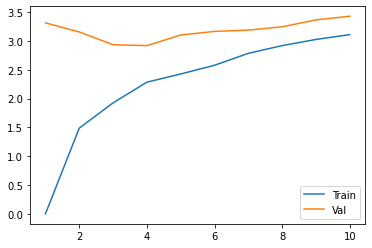

In [108]:
teste.plot(kind='line')